In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#tumor_dir = '/content/drive/MyDrive/Colab Notebooks/Breast Cancer/1st_stage/tumor'
#no_tumor_dir = '/content/drive/MyDrive/Colab Notebooks/Breast Cancer/1st_stage/no_tumor'

In [ ]:
img_height, img_width = 200, 200
batch_size = 64

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.15
)

train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Breast Cancer/1st_stage/train',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Breast Cancer/1st_stage/train',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Breast Cancer/1st_stage/test',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Don't shuffle for test set
)

Found 581 images belonging to 2 classes.
Found 101 images belonging to 2 classes.
Found 116 images belonging to 2 classes.


In [ ]:
'''
model = Sequential([
        Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(img_height, img_width,3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(5, 5), activation='relu'),
        Conv2D(128, kernel_size=(5, 5), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(.5),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax')

])


model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()
'''

"\nmodel = Sequential([\n        Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(img_height, img_width,3)),\n        MaxPooling2D(pool_size=(2, 2)),\n        Conv2D(64, kernel_size=(5, 5), activation='relu'),\n        Conv2D(128, kernel_size=(5, 5), activation='relu'),\n        MaxPooling2D(pool_size=(2, 2)),\n        Flatten(),\n        Dense(256, activation='relu'),\n        Dropout(.5),\n        Dense(64, activation='relu'),\n        Dense(3, activation='softmax')\n\n])\n\n\nmodel.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])\n\nmodel.summary()\n"

In [ ]:
#100%

'''model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (7, 7), activation='relu', padding = 'same', input_shape=(img_height, img_width, 3)))
model.add(Conv2D(64, (6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, (5, 5), padding = 'same', activation='relu'))

# Convolutional Layer 3
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening Layer
model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.75))

# Fully Connected Layer 2
model.add(Dense(64, activation='relu'))

# Output Layer
model.add(Dense(2, activation='softmax'))  # 3 classes: benign, malignant, normal

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()
'''

"model = Sequential()\n\n# Convolutional Layer 1\nmodel.add(Conv2D(32, (7, 7), activation='relu', padding = 'same', input_shape=(img_height, img_width, 3)))\nmodel.add(Conv2D(64, (6, 6), activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\n\n# Convolutional Layer 2\nmodel.add(Conv2D(64, (5, 5), padding = 'same', activation='relu'))\n\n# Convolutional Layer 3\nmodel.add(Conv2D(128, (5, 5), activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\n\n# Flattening Layer\nmodel.add(Flatten())\n\n# Fully Connected Layer 1\nmodel.add(Dense(256, activation='relu'))\nmodel.add(Dropout(0.75))\n\n# Fully Connected Layer 2\nmodel.add(Dense(64, activation='relu'))\n\n# Output Layer\nmodel.add(Dense(2, activation='softmax'))  # 3 classes: benign, malignant, normal\n\n# Compile the model\nmodel.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])\n\nmodel.summary()\n"

In [ ]:
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (7, 7), activation='relu', padding = 'same', input_shape=(img_height, img_width, 3)))
#model.add(Conv2D(32, (6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, (5, 5), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening Layer
model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.75))

# Fully Connected Layer 2
model.add(Dense(64, activation='relu'))

# Output Layer
model.add(Dense(2, activation='softmax'))  # 3 classes: benign, malignant, normal

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 200, 200, 32)        │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 100, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 96, 96, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 147456)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │      37,748,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,821,570 (144.28 MB)

 Trainable params: 37,821,570 (144.28 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 30

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    #validation_steps= validation_generator.samples // batch_size,
    epochs=epochs,

)

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.8444 - loss: 0.2489 - val_accuracy: 1.0000 - val_loss: 0.0899
Epoch 2/30
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 1.0000 - loss: 0.1030

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 1.0000 - loss: 0.1030 - val_accuracy: 1.0000 - val_loss: 0.0795
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 308ms/step - accuracy: 0.9972 - loss: 0.1265 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 1.0000 - loss: 0.0055 - val_accuracy: 1.0000 - val_loss: 9.5330e-04
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 216ms/step - accuracy: 0.9915 - loss: 0.2059 - val_accuracy: 1.0000 - val_loss: 1.0260e-04
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 1.0000 - val_loss: 7.9451e-05
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 194ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 1.0000 - val_loss: 1.5502e-04
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 1.0000 - loss: 1.8953e-04 - val_accuracy: 1.0000 - val_loss: 1.7584e-04
Epoch 9/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 196ms/step - accuracy: 1.0000 - loss: 5.8340e-04 - val_accuracy: 1.000

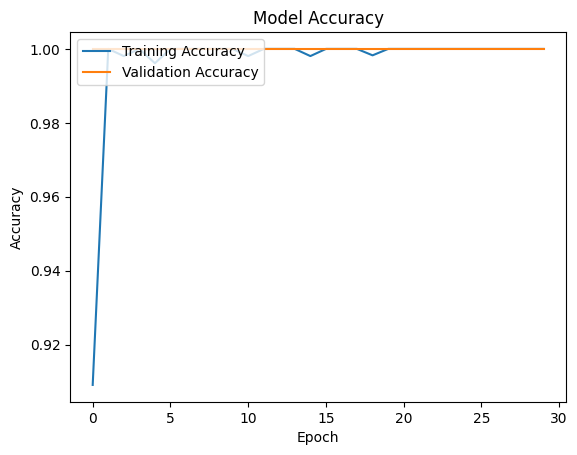

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [ ]:
Test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy*100:.2f}% and Test Loss: {Test_loss}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00
Test Accuracy: 100.00% and Test Loss: 0.0


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 290ms/step


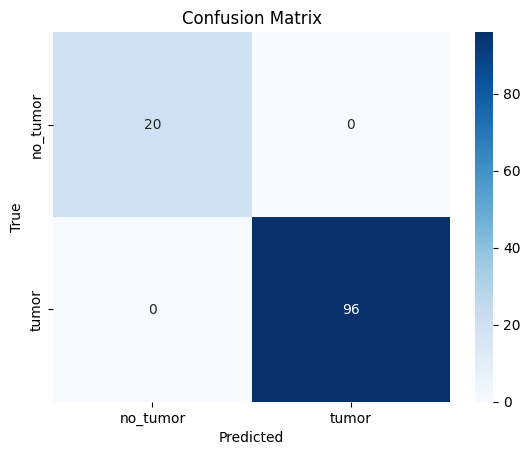

In [ ]:
# Confusion matrix
import seaborn as sns
y_true = test_generator.classes
y_pred = np.argmax((model.predict(test_generator) > 0.5).astype("int32"), axis=-1)

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices, yticklabels=train_generator.class_indices)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()